# Problema 1: Geisers de Yellowstone

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_table('../datasets/geyser.dat', sep="\s+")
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,272.0,136.500000,78.663842,1.0,68.75000,136.5,204.25000,272.0
eruptions,272.0,3.487783,1.141371,1.6,2.16275,4.0,4.45425,5.1
waiting,272.0,70.897059,13.594974,43.0,58.00000,76.0,82.00000,96.0


## Exploración de los datos

### Atributo eruptions
Tiempo de la erupción en minutos
Tipo: Numérico

In [10]:
df.eruptions.describe()

count    272.000000
mean       3.487783
std        1.141371
min        1.600000
25%        2.162750
50%        4.000000
75%        4.454250
max        5.100000
Name: eruptions, dtype: float64

In [13]:
df.eruptions.median()

4.0

<AxesSubplot:xlabel='eruptions', ylabel='Count'>

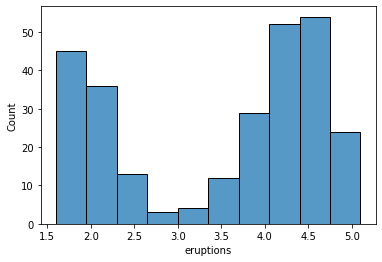

In [37]:
sns.histplot(data=df,x='eruptions')

<AxesSubplot:xlabel='eruptions'>

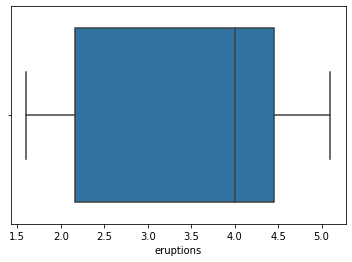

In [15]:
sns.boxplot(data=df, x='eruptions')

### Atributo waiting
Tiempo entre dos erupciones en minutos


fuente: https://www.rdocumentation.org/packages/mixAK/versions/5.3/topics/Faithful

In [16]:
df.waiting.describe()

count    272.000000
mean      70.897059
std       13.594974
min       43.000000
25%       58.000000
50%       76.000000
75%       82.000000
max       96.000000
Name: waiting, dtype: float64

In [17]:
df.waiting.median()

76.0

<AxesSubplot:xlabel='waiting', ylabel='Count'>

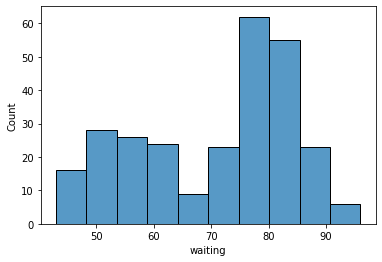

In [36]:
sns.histplot(data=df,x='waiting')

<AxesSubplot:xlabel='waiting'>

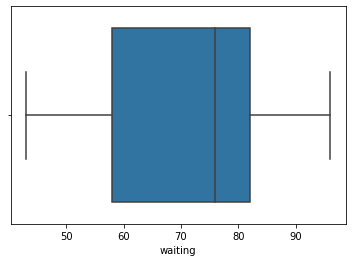

In [20]:
sns.boxplot(data=df, x='waiting')

### Buscamos relaciones enrte las variables

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

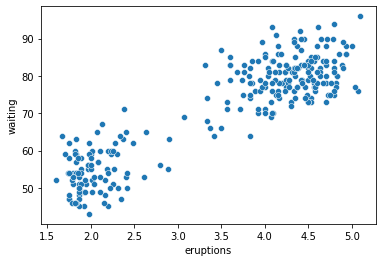

In [23]:
sns.scatterplot(data=df, x='eruptions',y='waiting')

Se puede observar que existe una clara distinción en dos grupos

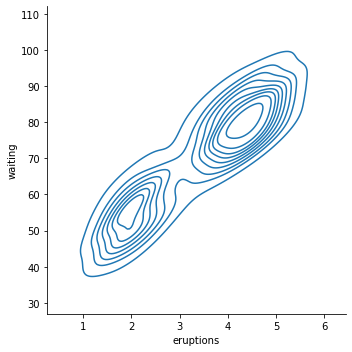

In [25]:
sns.displot(data=df, x="eruptions", y="waiting", kind="kde")

## Modelado

### Kmeans

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

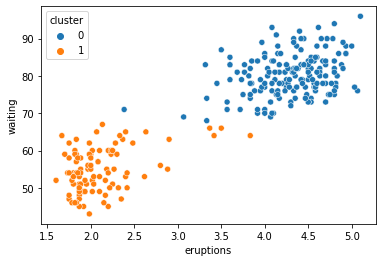

In [61]:
from sklearn.cluster import KMeans

X = df[['eruptions', 'waiting']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['cluster_kmeans'] = kmeans.predict(X)

sns.scatterplot(data=df, x='eruptions',y='waiting', hue='cluster_kmeans')

### Dbscan

Primer hacemos un dbscan "común" para comparar resultados con kmeans

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

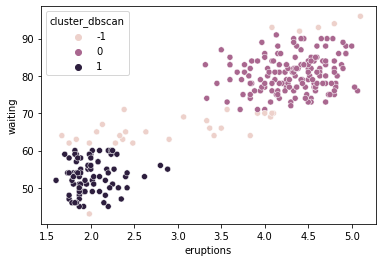

In [83]:
from sklearn.cluster import DBSCAN

X = df[['eruptions', 'waiting']]
dbscan = DBSCAN(eps=1.2, min_samples=10, metric='euclidean').fit(X)
df['cluster_dbscan'] = dbscan.fit_predict(X)
sns.scatterplot(data=df, x='eruptions',y='waiting', hue='cluster_dbscan')

Como segunda opción, podemos usar db scan para eliminar el ruido. De esta manera nos queda un gráfico mas limpio

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

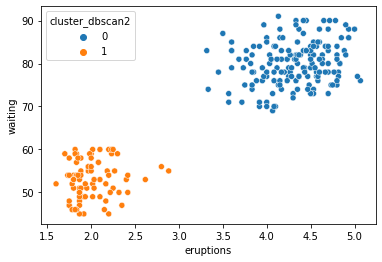

In [95]:
X = df[['eruptions', 'waiting']]
dbscan = DBSCAN(eps=1.1, min_samples=9, metric='euclidean').fit(X)
df['cluster_dbscan2'] = dbscan.fit_predict(X)
df2 = df.loc[df['cluster_dbscan2'] != -1]
sns.scatterplot(data=df2, x='eruptions',y='waiting', hue='cluster_dbscan2')